In [1]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
sys.path.append(parent_dir)

from functions_nfl.import_nfl_readby_parquet import NFLDataLoader

## Load Data

In [2]:
seasons = list(range(2014, 2026))
nfl_data_loader = NFLDataLoader()
schedule_import_df = nfl_data_loader.schedule(seasons)

In [3]:
schedule_import_df.columns.to_list()

['game_id',
 'season',
 'game_type',
 'week',
 'gameday',
 'weekday',
 'gametime',
 'away_team',
 'away_score',
 'home_team',
 'home_score',
 'location',
 'result',
 'total',
 'overtime',
 'old_game_id',
 'gsis',
 'nfl_detail_id',
 'pfr',
 'pff',
 'espn',
 'ftn',
 'away_rest',
 'home_rest',
 'away_moneyline',
 'home_moneyline',
 'spread_line',
 'away_spread_odds',
 'home_spread_odds',
 'total_line',
 'under_odds',
 'over_odds',
 'div_game',
 'roof',
 'surface',
 'temp',
 'wind',
 'away_qb_id',
 'home_qb_id',
 'away_qb_name',
 'home_qb_name',
 'away_coach',
 'home_coach',
 'referee',
 'stadium_id',
 'stadium']

In [4]:
spread_total_correlation = schedule_import_df['total_line'].corr(schedule_import_df['spread_line'])
spread_total_correlation

0.008553897063660276

In [5]:
abs_spread_total_correlation = schedule_import_df['total_line'].corr(np.abs(schedule_import_df['spread_line']))
abs_spread_total_correlation

0.005680047874410807

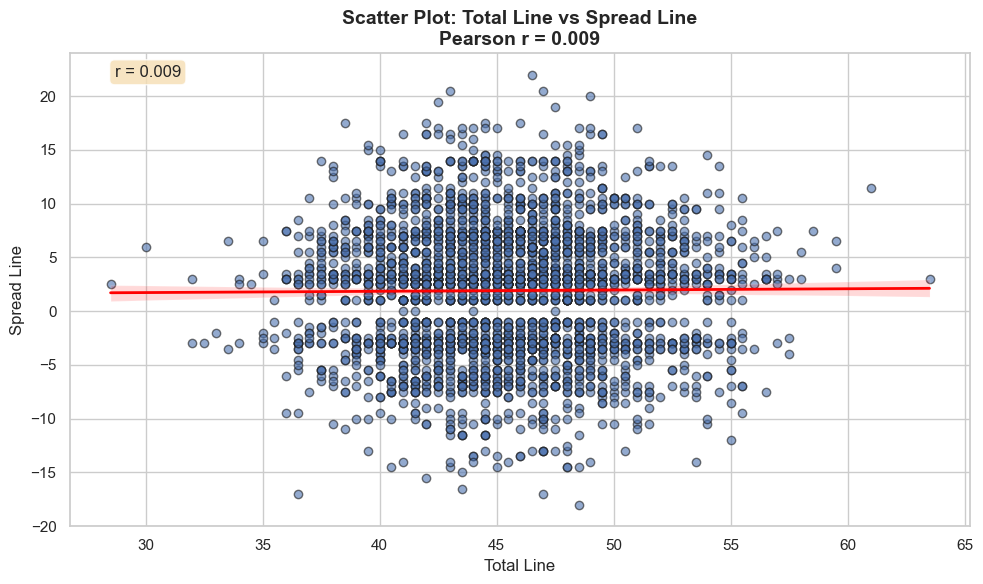

In [6]:
df = schedule_import_df
# Set style for better visuals
sns.set(style="whitegrid")

# Drop rows with NaN in either column to avoid plotting issues
data = df[['spread_line', 'total_line']].dropna()

# Calculate correlation
correlation = data['total_line'].corr(data['spread_line'])

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    x='total_line',
    y='spread_line',
    data=data,
    scatter_kws={'alpha': 0.6, 'edgecolor': 'k'},
    line_kws={'color': 'red', 'linewidth': 2}
)

# Add title and labels
plt.title(f'Scatter Plot: Total Line vs Spread Line\nPearson r = {correlation:.3f}', 
          fontsize=14, fontweight='bold')
plt.xlabel('Total Line', fontsize=12)
plt.ylabel('Spread Line', fontsize=12)

# Optional: Add correlation text on plot
plt.text(
    x=0.05, y=0.95,
    s=f'r = {correlation:.3f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.8)
)

plt.tight_layout()
plt.show()